Import Necessary Library

In [1]:
import os
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt
import random
import numpy as np
from IPython import display

Set Data Directory

In [2]:
DATA_DIR="/content/drive/MyDrive/Colab Notebooks/Myworks/dataset/animals/animals"

Load Catagories

In [3]:
def load_image(DATA_DIR):
  catagories=os.listdir(DATA_DIR)
  return catagories

Train Data Creation Function

In [4]:
def get_trained_data(catagories):
  trained_data=[]
  for c in catagories:
    new_path=os.path.join(DATA_DIR,c)
    for img in tqdm(os.listdir(new_path)):
        label=catagories.index(c)
        img_path=os.path.join(new_path,img)
        try:
          img_arr=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
          img_arr=cv2.resize(img_arr,(256,256))
        except:
          pass

        trained_data.append([img_arr,label])

  random.shuffle(trained_data)
  return trained_data

Calculate L1 Distance

In [5]:
def distance(train,valid):
  return np.sum(abs(train-valid))

KNN classifire Function

In [6]:
def KNN(validation_set,trained_set,k=5):
  dist=[]
  zindex=0
  for v in tqdm(validation_set):

      for t in trained_set:
          d=distance(t[0],v[0])
          labell=t[1]
          dist.append([d,labell,v[1]])
      zindex +=1
  dist.sort(key=lambda x: x[0])
  return dist[:k]

K-FOLD cross validation

In [7]:
def KFOLD(trained_set,kf=3,k_nei=3):
  point_dict={k_nei:[]}
  for i in range(kf):
    accuracy=0
    test=trained_set[i*(int(len(trained_set)/kf)):(i+1)*int(len(trained_set)/kf)]
    first=trained_set[0:i*int(len(trained_set)/kf)]
    last=trained_set[(i+1)*int(len(trained_set)/kf):]
    trained=first+last
    pred=KNN(test,trained,k_nei)
    print("-"*20)
    print("FOLD-",i+1)
    print(pred)
    for p in pred:
      if(p[2] == p[1]):
        accuracy +=1
    final_acc=accuracy/k_nei
    point_dict[k_nei].append(final_acc)
    print("Accuracy: ",final_acc*100,"%")

    print("-"*20)
  return point_dict








For showing Image from numpy image matrix

In [8]:
def show_image(img_matrix):
  plt.figure()
  plt.imshow(img_matrix)
  plt.show()


Create Catagories & Generate Train Data

In [9]:
catag=load_image(DATA_DIR)
trained_data=get_trained_data(catag)


100%|██████████| 1000/1000 [01:33<00:00, 10.73it/s]


For Each value of Z- k of knn. And get point every K-Fold=5

In [10]:
m=0
K_nei=[3, 5, 9, 13, 15, 20,25]
points=[]
for i in K_nei:

  print(m,"-"*20)
  point=KFOLD(trained_data,kf=5,k_nei=i)
  points.append(point)
  print("-"*7)
  m +=1



print(points)

0 --------------------


100%|██████████| 600/600 [01:50<00:00,  5.42it/s]


--------------------
FOLD- 1
[[2714301, 0, 1], [2900075, 2, 1], [3046677, 1, 1]]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.33it/s]


--------------------
FOLD- 2
[[3194459, 1, 0], [3647587, 0, 0], [3735559, 1, 1]]
Accuracy:  66.66666666666666 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.38it/s]


--------------------
FOLD- 3
[[3691829, 0, 2], [3767583, 2, 1], [3783124, 1, 1]]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.33it/s]


--------------------
FOLD- 4
[[3717658, 0, 1], [3851999, 0, 1], [3872705, 1, 1]]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.35it/s]


--------------------
FOLD- 5
[[3725733, 0, 1], [3909935, 1, 1], [3928493, 0, 0]]
Accuracy:  66.66666666666666 %
--------------------
-------
1 --------------------


100%|██████████| 600/600 [01:55<00:00,  5.19it/s]


--------------------
FOLD- 1
[[2714301, 0, 1], [2900075, 2, 1], [3046677, 1, 1], [3095748, 0, 1], [3200227, 0, 1]]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [01:53<00:00,  5.28it/s]


--------------------
FOLD- 2
[[3194459, 1, 0], [3647587, 0, 0], [3735559, 1, 1], [3803323, 1, 0], [3815157, 0, 1]]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [01:50<00:00,  5.42it/s]


--------------------
FOLD- 3
[[3691829, 0, 2], [3767583, 2, 1], [3783124, 1, 1], [3801386, 2, 1], [3830030, 1, 1]]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.37it/s]


--------------------
FOLD- 4
[[3717658, 0, 1], [3851999, 0, 1], [3872705, 1, 1], [3915426, 0, 1], [3951570, 0, 0]]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.34it/s]


--------------------
FOLD- 5
[[3725733, 0, 1], [3909935, 1, 1], [3928493, 0, 0], [3950715, 1, 0], [4058141, 1, 0]]
Accuracy:  40.0 %
--------------------
-------
2 --------------------


100%|██████████| 600/600 [01:53<00:00,  5.30it/s]


--------------------
FOLD- 1
[[2714301, 0, 1], [2900075, 2, 1], [3046677, 1, 1], [3095748, 0, 1], [3200227, 0, 1], [3330734, 1, 0], [3343965, 0, 0], [3352324, 1, 1], [3375710, 2, 1]]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.32it/s]


--------------------
FOLD- 2
[[3194459, 1, 0], [3647587, 0, 0], [3735559, 1, 1], [3803323, 1, 0], [3815157, 0, 1], [3834419, 0, 1], [3856956, 1, 1], [3858177, 0, 1], [3868266, 0, 0]]
Accuracy:  44.44444444444444 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.37it/s]


--------------------
FOLD- 3
[[3691829, 0, 2], [3767583, 2, 1], [3783124, 1, 1], [3801386, 2, 1], [3830030, 1, 1], [3838188, 1, 1], [3845682, 2, 1], [3854285, 0, 0], [3889780, 1, 0]]
Accuracy:  44.44444444444444 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.34it/s]


--------------------
FOLD- 4
[[3717658, 0, 1], [3851999, 0, 1], [3872705, 1, 1], [3915426, 0, 1], [3951570, 0, 0], [3999049, 1, 0], [4010328, 1, 0], [4056675, 1, 1], [4080175, 1, 0]]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.36it/s]


--------------------
FOLD- 5
[[3725733, 0, 1], [3909935, 1, 1], [3928493, 0, 0], [3950715, 1, 0], [4058141, 1, 0], [4063767, 0, 1], [4094164, 1, 1], [4108030, 1, 1], [4147796, 0, 1]]
Accuracy:  44.44444444444444 %
--------------------
-------
3 --------------------


100%|██████████| 600/600 [01:51<00:00,  5.38it/s]


--------------------
FOLD- 1
[[2714301, 0, 1], [2900075, 2, 1], [3046677, 1, 1], [3095748, 0, 1], [3200227, 0, 1], [3330734, 1, 0], [3343965, 0, 0], [3352324, 1, 1], [3375710, 2, 1], [3429191, 1, 0], [3591405, 2, 1], [3665100, 2, 1], [3704427, 0, 1]]
Accuracy:  23.076923076923077 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.35it/s]


--------------------
FOLD- 2
[[3194459, 1, 0], [3647587, 0, 0], [3735559, 1, 1], [3803323, 1, 0], [3815157, 0, 1], [3834419, 0, 1], [3856956, 1, 1], [3858177, 0, 1], [3868266, 0, 0], [3889455, 1, 1], [3921144, 0, 1], [3951110, 2, 0], [3986926, 2, 1]]
Accuracy:  38.46153846153847 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.40it/s]


--------------------
FOLD- 3
[[3691829, 0, 2], [3767583, 2, 1], [3783124, 1, 1], [3801386, 2, 1], [3830030, 1, 1], [3838188, 1, 1], [3845682, 2, 1], [3854285, 0, 0], [3889780, 1, 0], [3892522, 1, 0], [3901620, 1, 0], [3924867, 0, 1], [3928013, 1, 1]]
Accuracy:  38.46153846153847 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.33it/s]


--------------------
FOLD- 4
[[3717658, 0, 1], [3851999, 0, 1], [3872705, 1, 1], [3915426, 0, 1], [3951570, 0, 0], [3999049, 1, 0], [4010328, 1, 0], [4056675, 1, 1], [4080175, 1, 0], [4097021, 1, 1], [4105948, 0, 0], [4126564, 1, 0], [4132186, 2, 1]]
Accuracy:  38.46153846153847 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.36it/s]


--------------------
FOLD- 5
[[3725733, 0, 1], [3909935, 1, 1], [3928493, 0, 0], [3950715, 1, 0], [4058141, 1, 0], [4063767, 0, 1], [4094164, 1, 1], [4108030, 1, 1], [4147796, 0, 1], [4176413, 2, 1], [4178024, 0, 0], [4192473, 0, 0], [4225074, 2, 1]]
Accuracy:  46.15384615384615 %
--------------------
-------
4 --------------------


100%|██████████| 600/600 [01:51<00:00,  5.37it/s]


--------------------
FOLD- 1
[[2714301, 0, 1], [2900075, 2, 1], [3046677, 1, 1], [3095748, 0, 1], [3200227, 0, 1], [3330734, 1, 0], [3343965, 0, 0], [3352324, 1, 1], [3375710, 2, 1], [3429191, 1, 0], [3591405, 2, 1], [3665100, 2, 1], [3704427, 0, 1], [3711652, 0, 0], [3716990, 1, 0]]
Accuracy:  26.666666666666668 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.35it/s]


--------------------
FOLD- 2
[[3194459, 1, 0], [3647587, 0, 0], [3735559, 1, 1], [3803323, 1, 0], [3815157, 0, 1], [3834419, 0, 1], [3856956, 1, 1], [3858177, 0, 1], [3868266, 0, 0], [3889455, 1, 1], [3921144, 0, 1], [3951110, 2, 0], [3986926, 2, 1], [4013476, 1, 1], [4014493, 1, 1]]
Accuracy:  46.666666666666664 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.37it/s]


--------------------
FOLD- 3
[[3691829, 0, 2], [3767583, 2, 1], [3783124, 1, 1], [3801386, 2, 1], [3830030, 1, 1], [3838188, 1, 1], [3845682, 2, 1], [3854285, 0, 0], [3889780, 1, 0], [3892522, 1, 0], [3901620, 1, 0], [3924867, 0, 1], [3928013, 1, 1], [3937445, 1, 1], [3948104, 1, 0]]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.37it/s]


--------------------
FOLD- 4
[[3717658, 0, 1], [3851999, 0, 1], [3872705, 1, 1], [3915426, 0, 1], [3951570, 0, 0], [3999049, 1, 0], [4010328, 1, 0], [4056675, 1, 1], [4080175, 1, 0], [4097021, 1, 1], [4105948, 0, 0], [4126564, 1, 0], [4132186, 2, 1], [4139821, 0, 1], [4145572, 0, 1]]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [01:56<00:00,  5.17it/s]


--------------------
FOLD- 5
[[3725733, 0, 1], [3909935, 1, 1], [3928493, 0, 0], [3950715, 1, 0], [4058141, 1, 0], [4063767, 0, 1], [4094164, 1, 1], [4108030, 1, 1], [4147796, 0, 1], [4176413, 2, 1], [4178024, 0, 0], [4192473, 0, 0], [4225074, 2, 1], [4232920, 0, 0], [4233151, 1, 1]]
Accuracy:  53.333333333333336 %
--------------------
-------
5 --------------------


100%|██████████| 600/600 [01:52<00:00,  5.35it/s]


--------------------
FOLD- 1
[[2714301, 0, 1], [2900075, 2, 1], [3046677, 1, 1], [3095748, 0, 1], [3200227, 0, 1], [3330734, 1, 0], [3343965, 0, 0], [3352324, 1, 1], [3375710, 2, 1], [3429191, 1, 0], [3591405, 2, 1], [3665100, 2, 1], [3704427, 0, 1], [3711652, 0, 0], [3716990, 1, 0], [3720789, 2, 1], [3754499, 1, 0], [3754641, 0, 1], [3760571, 0, 1], [3765886, 2, 1]]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.35it/s]


--------------------
FOLD- 2
[[3194459, 1, 0], [3647587, 0, 0], [3735559, 1, 1], [3803323, 1, 0], [3815157, 0, 1], [3834419, 0, 1], [3856956, 1, 1], [3858177, 0, 1], [3868266, 0, 0], [3889455, 1, 1], [3921144, 0, 1], [3951110, 2, 0], [3986926, 2, 1], [4013476, 1, 1], [4014493, 1, 1], [4027766, 1, 1], [4083972, 2, 0], [4084982, 1, 0], [4094378, 1, 0], [4103743, 0, 0]]
Accuracy:  45.0 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.37it/s]


--------------------
FOLD- 3
[[3691829, 0, 2], [3767583, 2, 1], [3783124, 1, 1], [3801386, 2, 1], [3830030, 1, 1], [3838188, 1, 1], [3845682, 2, 1], [3854285, 0, 0], [3889780, 1, 0], [3892522, 1, 0], [3901620, 1, 0], [3924867, 0, 1], [3928013, 1, 1], [3937445, 1, 1], [3948104, 1, 0], [3958715, 1, 0], [3977438, 0, 1], [3979497, 2, 0], [3981046, 0, 0], [3981214, 1, 1]]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.37it/s]


--------------------
FOLD- 4
[[3717658, 0, 1], [3851999, 0, 1], [3872705, 1, 1], [3915426, 0, 1], [3951570, 0, 0], [3999049, 1, 0], [4010328, 1, 0], [4056675, 1, 1], [4080175, 1, 0], [4097021, 1, 1], [4105948, 0, 0], [4126564, 1, 0], [4132186, 2, 1], [4139821, 0, 1], [4145572, 0, 1], [4163616, 0, 1], [4180533, 1, 0], [4187879, 1, 0], [4195763, 0, 1], [4222132, 1, 1]]
Accuracy:  30.0 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.36it/s]


--------------------
FOLD- 5
[[3725733, 0, 1], [3909935, 1, 1], [3928493, 0, 0], [3950715, 1, 0], [4058141, 1, 0], [4063767, 0, 1], [4094164, 1, 1], [4108030, 1, 1], [4147796, 0, 1], [4176413, 2, 1], [4178024, 0, 0], [4192473, 0, 0], [4225074, 2, 1], [4232920, 0, 0], [4233151, 1, 1], [4240764, 0, 1], [4243647, 1, 0], [4247061, 0, 0], [4253478, 0, 1], [4299469, 1, 0]]
Accuracy:  45.0 %
--------------------
-------
6 --------------------


100%|██████████| 600/600 [01:51<00:00,  5.36it/s]


--------------------
FOLD- 1
[[2714301, 0, 1], [2900075, 2, 1], [3046677, 1, 1], [3095748, 0, 1], [3200227, 0, 1], [3330734, 1, 0], [3343965, 0, 0], [3352324, 1, 1], [3375710, 2, 1], [3429191, 1, 0], [3591405, 2, 1], [3665100, 2, 1], [3704427, 0, 1], [3711652, 0, 0], [3716990, 1, 0], [3720789, 2, 1], [3754499, 1, 0], [3754641, 0, 1], [3760571, 0, 1], [3765886, 2, 1], [3797771, 0, 1], [3802813, 0, 0], [3822720, 1, 0], [3828100, 1, 1], [3849476, 1, 0]]
Accuracy:  24.0 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.36it/s]


--------------------
FOLD- 2
[[3194459, 1, 0], [3647587, 0, 0], [3735559, 1, 1], [3803323, 1, 0], [3815157, 0, 1], [3834419, 0, 1], [3856956, 1, 1], [3858177, 0, 1], [3868266, 0, 0], [3889455, 1, 1], [3921144, 0, 1], [3951110, 2, 0], [3986926, 2, 1], [4013476, 1, 1], [4014493, 1, 1], [4027766, 1, 1], [4083972, 2, 0], [4084982, 1, 0], [4094378, 1, 0], [4103743, 0, 0], [4107342, 1, 1], [4115346, 0, 1], [4120823, 0, 1], [4123522, 1, 0], [4126009, 0, 1]]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [01:51<00:00,  5.36it/s]


--------------------
FOLD- 3
[[3691829, 0, 2], [3767583, 2, 1], [3783124, 1, 1], [3801386, 2, 1], [3830030, 1, 1], [3838188, 1, 1], [3845682, 2, 1], [3854285, 0, 0], [3889780, 1, 0], [3892522, 1, 0], [3901620, 1, 0], [3924867, 0, 1], [3928013, 1, 1], [3937445, 1, 1], [3948104, 1, 0], [3958715, 1, 0], [3977438, 0, 1], [3979497, 2, 0], [3981046, 0, 0], [3981214, 1, 1], [4028727, 0, 0], [4054721, 1, 2], [4086538, 1, 0], [4092868, 2, 1], [4114254, 1, 0]]
Accuracy:  36.0 %
--------------------


100%|██████████| 600/600 [01:52<00:00,  5.35it/s]


--------------------
FOLD- 4
[[3717658, 0, 1], [3851999, 0, 1], [3872705, 1, 1], [3915426, 0, 1], [3951570, 0, 0], [3999049, 1, 0], [4010328, 1, 0], [4056675, 1, 1], [4080175, 1, 0], [4097021, 1, 1], [4105948, 0, 0], [4126564, 1, 0], [4132186, 2, 1], [4139821, 0, 1], [4145572, 0, 1], [4163616, 0, 1], [4180533, 1, 0], [4187879, 1, 0], [4195763, 0, 1], [4222132, 1, 1], [4240879, 1, 1], [4254325, 1, 0], [4258819, 1, 0], [4277020, 1, 1], [4282451, 0, 0]]
Accuracy:  36.0 %
--------------------


100%|██████████| 600/600 [01:50<00:00,  5.42it/s]


--------------------
FOLD- 5
[[3725733, 0, 1], [3909935, 1, 1], [3928493, 0, 0], [3950715, 1, 0], [4058141, 1, 0], [4063767, 0, 1], [4094164, 1, 1], [4108030, 1, 1], [4147796, 0, 1], [4176413, 2, 1], [4178024, 0, 0], [4192473, 0, 0], [4225074, 2, 1], [4232920, 0, 0], [4233151, 1, 1], [4240764, 0, 1], [4243647, 1, 0], [4247061, 0, 0], [4253478, 0, 1], [4299469, 1, 0], [4304415, 2, 1], [4306592, 0, 0], [4326912, 0, 1], [4330345, 1, 1], [4338158, 0, 0]]
Accuracy:  48.0 %
--------------------
-------
[{3: [0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666]}, {5: [0.2, 0.4, 0.4, 0.4, 0.4]}, {9: [0.3333333333333333, 0.4444444444444444, 0.4444444444444444, 0.3333333333333333, 0.4444444444444444]}, {13: [0.23076923076923078, 0.38461538461538464, 0.38461538461538464, 0.38461538461538464, 0.46153846153846156]}, {15: [0.26666666666666666, 0.4666666666666667, 0.4, 0.3333333333333333, 0.5333333333333333]}, {20: [0.2, 0.45, 0.4, 0.3, 0.45]}, {25: [0.2

Plotting values of points

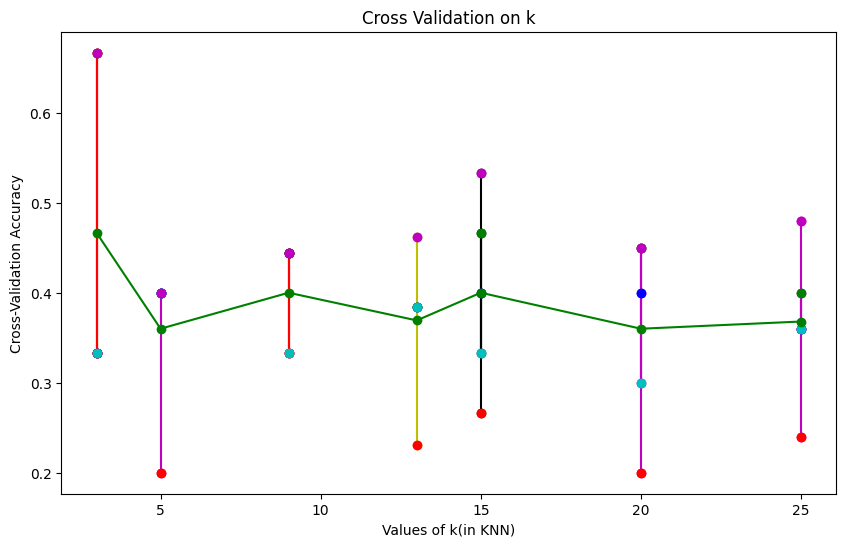

[3, 5, 9, 13, 15, 20, 25]


In [11]:
result_dict = {}
middle_point=[]

for item in points:
    result_dict.update(item)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,6))
plt.title("Cross Validation on k")
plt.ylabel("Cross-Validation Accuracy")
plt.xlabel("Values of k(in KNN)")
for idx2,(key,values) in  enumerate(result_dict.items()):
  avg=np.sum(values)/len(values)
  middle_point.append(avg)
  x_values = [key] * len(values)
  plt.plot(x_values, values, marker='o', color=random.choice(colors), linestyle='-')

  for idx,val in enumerate(values):
      plt.plot(key,val,marker='o',color=colors[idx],linestyle='-')

plt.plot(K_nei,middle_point,marker='o',color='g',linestyle='-')
plt.show()
print(K_nei)